In [1]:
%pylab inline

import pandas
import scipy.stats as sps
import numpy as np
import matplotlib.pyplot as plt

size = 100
grid = np.arange(1, size +1)
alpha = 0.95

Populating the interactive namespace from numpy and matplotlib


In [2]:
# функция для построения графика
def build_graph(down, up, title):
    fig = plt.figure(figsize=(20, 10))
    plt.grid(True)
    plt.title(title, fontsize=15)
    ax = fig.gca()
    plt.fill_between(grid, down, up, color='red')
    ax.set_xlim(1, size)
    ax.set_ylim(down.mean() - 3, up.mean() + 3)
    plt.show()

In [3]:
samples_cnt = 10000 # количество выборок, по которым будем считать вероятность. должно хватить :)

# функция для оценки вероятности попадания истинного значения 𝜃 в интервал
def print_interval_prob(down_func, up_func, gen_func, cur_param):
    cor_theta_cnt_10 = 0 # количество правильных theta при n=10
    cor_theta_cnt_100 = 0 # количество правильных theta при n=100
    
    for i in range(samples_cnt):    
        X = gen_func() # генерируем выборку
        
        # проверяем на попадание в интервалы
        if  down_func(X[:10]) < cur_param < up_func(X[:10]): 
                cor_theta_cnt_10 += 1
                
        if  down_func(X) < cur_param < up_func(X):
                cor_theta_cnt_100 +=1
                
    print 'Вероятность попадания theta в доверительный интервал:'
    print 'при n = 10 : ' + str(cor_theta_cnt_10 / float(samples_cnt))
    print 'при n = 100 : ' + str(cor_theta_cnt_100 / float(samples_cnt))

# 1

In [4]:
s = sps.uniform.rvs(size=size, loc=0, scale=1) # генерируем выборку

Доверительный интервал уровня $\alpha$ для $U(0, \theta)$ - $(\frac{2 \overline X}{1 + \frac{1}{\sqrt{3n(1-\alpha)}}}, \frac{2 \overline X}{1 - \frac{1}{\sqrt{3n(1-\alpha)}}})$

In [5]:
print_interval_prob(lambda X: 2 * X.mean() * (1 + (3 * X.size * (1 - alpha))**(-0.5))**(-1), # нижняя оценка
                    lambda X: 2 * X.mean() * (1 - (3 * X.size * (1 - alpha))**(-0.5))**(-1), # верхняя оценка
                    lambda : sps.uniform.rvs(size=size, loc=0, scale=1), # функция генерации выборки
                    1) # оцениваемый параметр

Вероятность попадания theta в доверительный интервал:
при n = 10 : 1.0
при n = 100 : 1.0


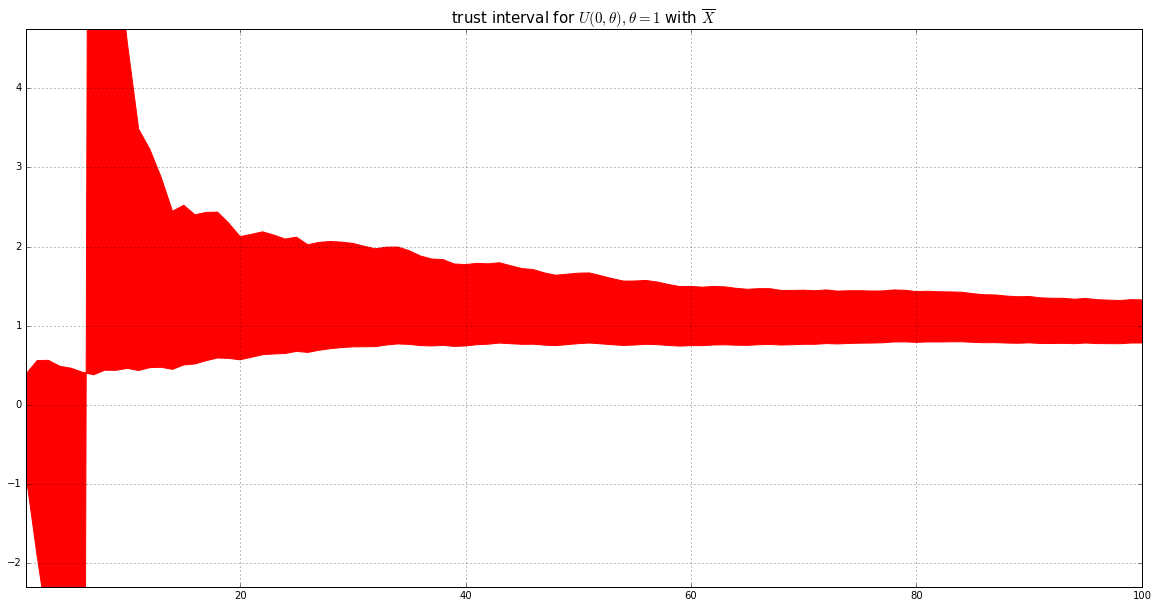

In [6]:
average = s.cumsum() / np.arange(1., size + 1.) # считаем средние

build_graph(2 * average * (1 + (3 * np.arange(1., size + 1.) * (1 - alpha))**(-0.5))**(-1), # нижняя оценка
            2 * average * (1 - (3 * np.arange(1., size + 1.) * (1 - alpha))**(-0.5))**(-1), # верхняя оценка
            r'trust interval for $U(0, \theta), \theta=1$ with $\overline{X}$')

Доверительный интервал уровня $\alpha$ для $U(0, \theta)$ - $(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$. 

In [7]:
print_interval_prob(lambda X: np.min(X), # нижняя оценка
                    lambda X: np.min(X) / (1 - alpha ** (1. / X.size)), # верхняя оценка
                    lambda : sps.uniform.rvs(size=size, loc=0, scale=1), # функция генерации выборки
                    1)  # оцениваемый параметр

Вероятность попадания theta в доверительный интервал:
при n = 10 : 0.9505
при n = 100 : 0.9455


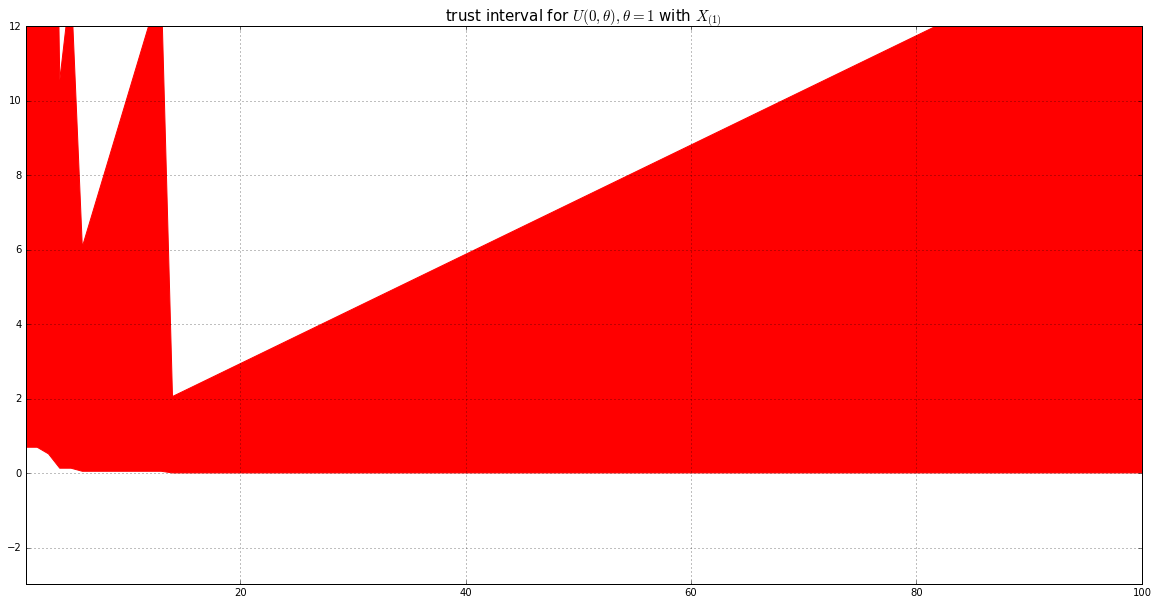

In [8]:
# считаем порядковые статистики 
min_ar = np.zeros(size)
min_ar[0] = s[0]
max_ar = np.zeros(size)
max_ar[0] = s[0]
for n in range(1, size):
    min_ar[n] = min(min_ar[n - 1], s[n])
    max_ar[n] = max(max_ar[n - 1], s[n])

build_graph(min_ar, # нижняя оценка
            min_ar / (1 - alpha**(1. / np.arange(1., size + 1.))), # верхняя оценка
            r'trust interval for $U(0, \theta), \theta=1$ with $X_{(1)}$')

Доверительный интервал уровня $\alpha$ для $U(0, \theta)$ - это $(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$. 

In [9]:
print_interval_prob(lambda X: np.max(X), # нижняя оценка
                    lambda X: np.max(X) / ((1 - alpha) ** (1. / X.size)), # верхняя оценка
                    lambda : sps.uniform.rvs(size=size, loc=0, scale=1), # функция генерации выборки
                    1) # оцениваемый параметр

Вероятность попадания theta в доверительный интервал:
при n = 10 : 0.9507
при n = 100 : 0.9519


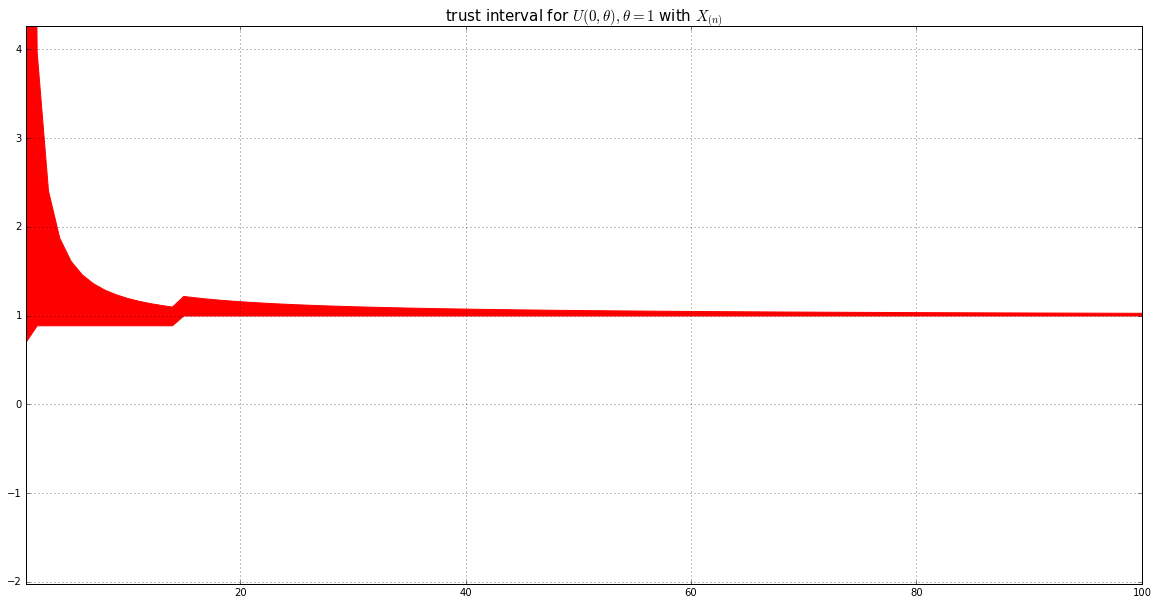

In [10]:
build_graph(max_ar, # нижняя оценка
            max_ar / ((1 - alpha)**(1 / np.arange(1., size + 1.))), # верхняя оценка
            r'trust interval for $U(0, \theta), \theta=1$ with $X_{(n)}$')

Доверительный интервал с $X_{(n)}$ лучше

# 2

In [11]:
s = sps.cauchy.rvs(size=size, loc=1, scale=1) # генерируем выборка

Асимптотический доверительный интервал уровня $\alpha$ для $Cauchy(\theta, 1)$ - $(\mu - \frac{\pi z} {2 \sqrt{n}}, \mu + \frac{\pi z} {2 \sqrt{n}})$, где $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$, $\mu$ - медиана 

In [12]:
z = sps.norm.ppf(0.5 + alpha / 2) # считаем квантиль

print_interval_prob(lambda X: np.median(X) - np.pi * z * 0.5 * ((1. / X.size) ** 0.5), # нижняя оценка
                    lambda X: np.median(X) + np.pi * z * 0.5 * ((1. / X.size) ** 0.5), # верхняя оценка
                    lambda : sps.cauchy.rvs(size=size, loc=1, scale=1), # функция генерации выборки
                    1) # оцениваемый параметр

Вероятность попадания theta в доверительный интервал:
при n = 10 : 0.9186
при n = 100 : 0.9467


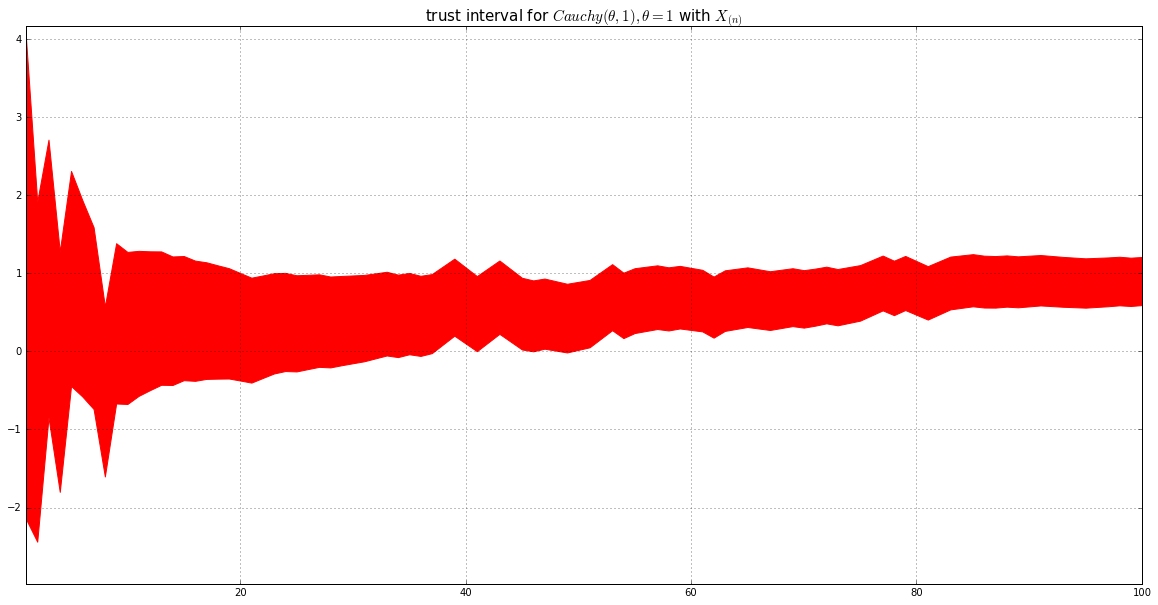

In [13]:
# Считаем выборочные медианы
med_ar = np.zeros(size)

for n in range(1, size+1):
    med_ar[n-1] = np.median(s[:n])

build_graph(med_ar - np.pi * z * 0.5 * ((1 / np.arange(1., size + 1.)) ** 0.5), # нижняя оценка
            med_ar + np.pi * z * 0.5 * ((1 / np.arange(1., size + 1.)) ** 0.5), # верхняя оценка
            r'trust interval for $Cauchy(\theta, 1), \theta=1$ with $X_{(n)}$')

# 3

In [14]:
s = sps.poisson.rvs(size=size, mu=1) # генерируем выборку

Асимптотический доверительный интервал уровня $\alpha$ для $Pois(\theta)$ - $(\overline X - z \sqrt{\frac{\overline X}{n}}, \overline X + z \sqrt{\frac{\overline X}{n}})$, где $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

In [15]:
print_interval_prob(lambda X: X.mean() - z * ((X.mean() / float(X.size)) ** 0.5), # нижняя оценка
                    lambda X: X.mean() + z * ((X.mean() / float(X.size)) ** 0.5), # верхняя оценка
                    lambda : sps.poisson.rvs(size=size, mu=1), # функция генерации выборки
                    1) # оцениваемый параметр

Вероятность попадания theta в доверительный интервал:
при n = 10 : 0.9264
при n = 100 : 0.9465


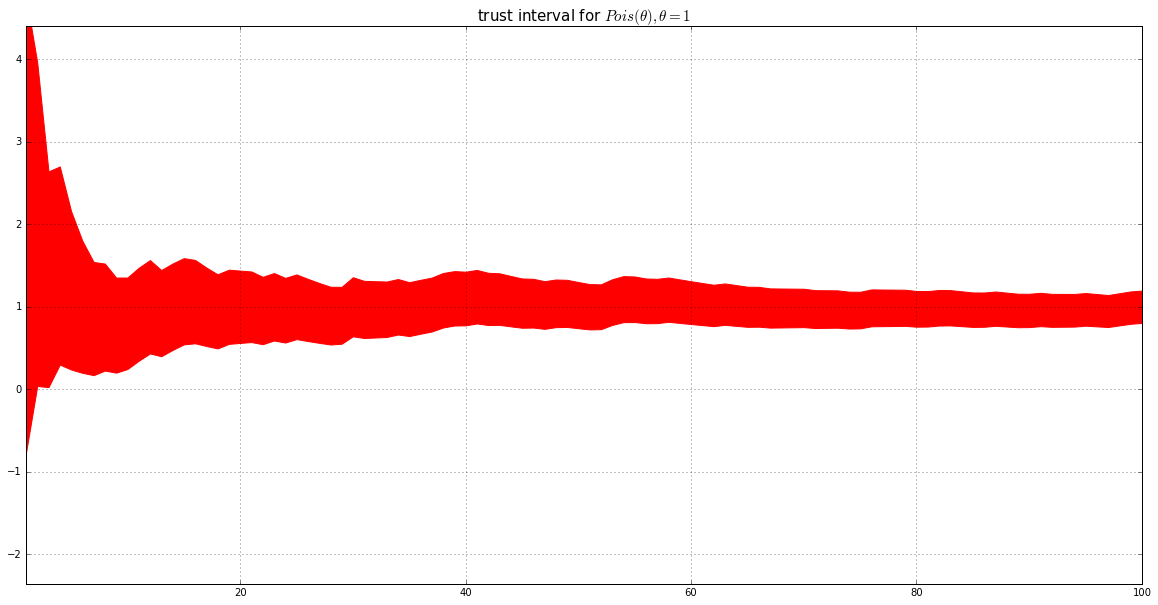

In [16]:
average = s.cumsum() / np.arange(1., size + 1.) # считаем массив средних

build_graph(average - z * ((average / np.arange(1., size + 1.)) ** 0.5), # нижняя оценка
            average + z * ((average / np.arange(1., size + 1.)) ** 0.5), # верхняя оценка
            r'trust interval for $Pois(\theta), \theta=1$')

# 4

In [17]:
s = sps.gamma.rvs(size=size, a=1, scale=0.1) # генерируем выборку

Асимптотический доверительный интервал уровня $\alpha$ для $Г(\theta, \lambda)$ - это $(\frac{\lambda - z \sqrt{\frac{\lambda}{n}}}{\overline X}, \frac{\lambda + z \sqrt{\frac{\lambda}{n}}}{\overline X})$, где $z$ - квантиль нормального распределения уровня $\frac{\alpha + 1}{2}$ 

In [18]:
print_interval_prob(lambda X: (1 - z * ((1. / X.size) ** 0.5)) * (1. / X.mean()), # нижняя оценка
                    lambda X: (1 + z * ((1. / X.size) ** 0.5)) * (1. / X.mean()), # верхняя оценка
                    lambda : sps.gamma.rvs(size=size, a=1, scale=0.1), # функция генерации выборки
                    10) # оцениваемый параметр

Вероятность попадания theta в доверительный интервал:
при n = 10 : 0.9561
при n = 100 : 0.9491


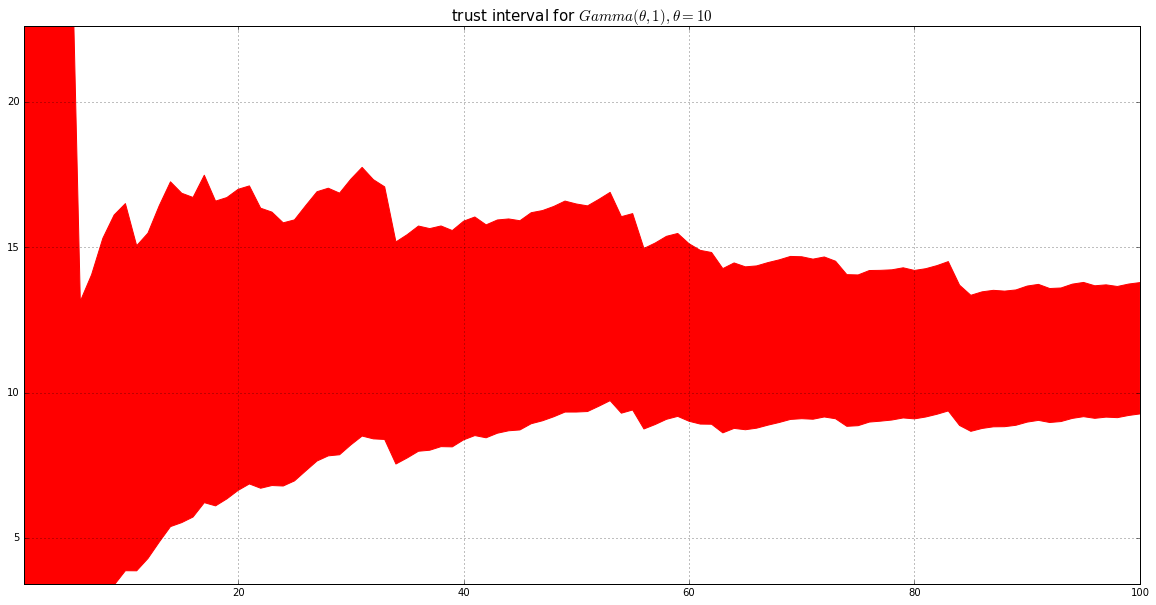

In [19]:
average_inv = np.arange(1., size + 1.) * (1 / s.cumsum()) # считаем массив средних в -1

build_graph((1 - z * ((1 / np.arange(1., size + 1.)) ** 0.5)) * average_inv, # нижняя оценка
            (1 + z * ((1 / np.arange(1., size + 1.)) ** 0.5)) * average_inv, # верхняя оценка
            r'trust interval for $Gamma(\theta, 1), \theta=10$')